# Boltzmann levels python

<div class="exercise admonition" name="2ex3" style="padding: 10px">
<p class="title">Exercise 3</p>
 Modify the code  to calculate the
    occupancy of each state within the harmonic oscillator system.
    Present the entire code file within your report and comment upon the main features using `#` (Python).
</div>


<div class="exercise admonition" name="2ex4" style="padding: 10px">
<p class="title">Exercise 4</p>
Calculate using your program the occupancy of each state within the harmonic oscillator at the reduced temperatures of 0.5, 1, 2 and 3,  with `numberOfEnergyLevels` set to 10 (recall $\epsilon = 1$). Using the output file the code generates, plot the distribution and present the graphs in your report. What do you note at higher temperature?
</div>

<div class="exercise admonition" name="2ex5" style="padding: 10px">
<p class="title">Exercise 5</p>
Change the `calculateStateOccupancy()` function such that the
    degeneracies $(s + 1)$ and $(s + 2)$ are considered, where $s$ is
    the index of the energy level (use `numberOfEnergyLevels` = 10 and
    `reducedTemperature` = 0.5). Plot the results and include the graphs
    in your report. What can you infer from this trend?
</div>


<div class="exercise admonition" name="2ex6" style="padding: 10px">
<p class="title">Exercise 6</p>
Modify your program such that the state occupancy and partition
function are calculated for a linear rotor with moment of inertia $I$. Compare your results at different temperatures with the approximate result {eq}`approximateresult`. 
</div>


$$
Z = \frac{2I}{\beta\hbar^2}
$$ (approximateresult)

using

$$
\frac{I}{\hbar^2} = 1.
$$

Note that the energy levels of a linear rotor are:

$$
U = J(J+1)\frac{\hbar^2}{2I}
$$

with $J= 0, 1, 2, \dots, \infty$ and the degeneracy of level J is $2J +1$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-ticks', 'seaborn-talk'])


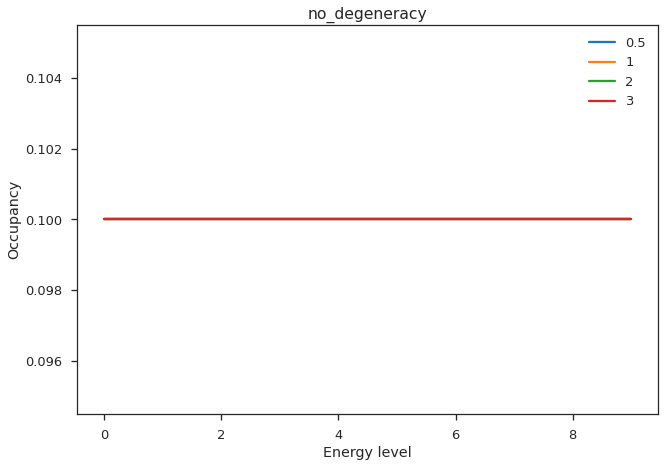

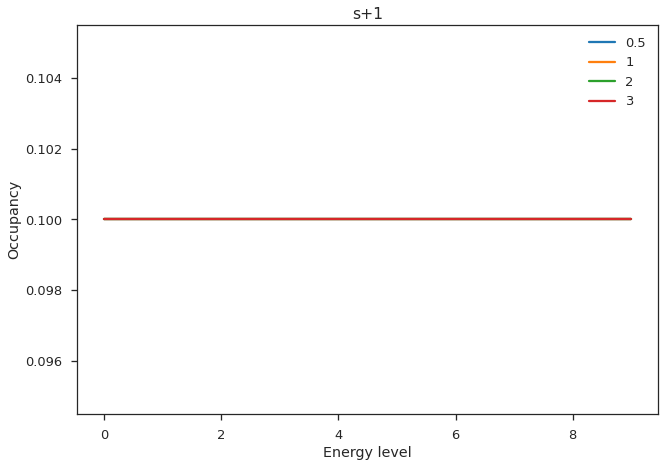

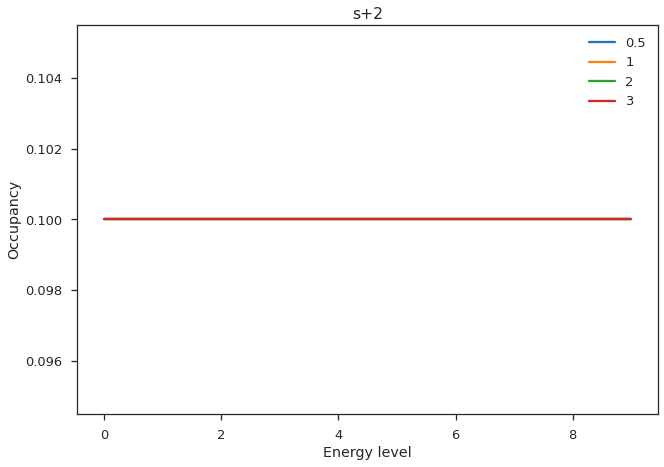

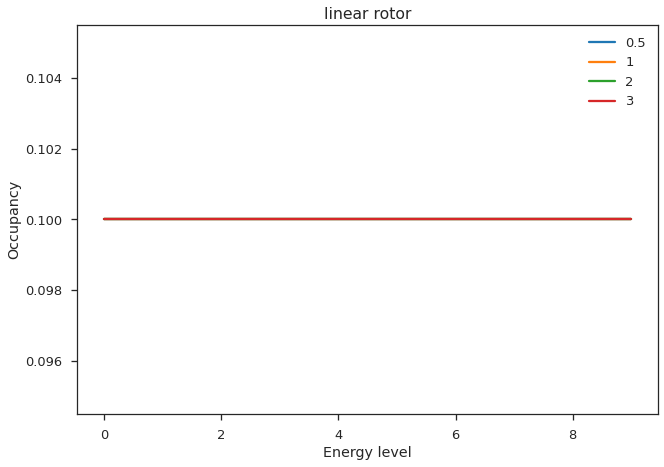

In [2]:
n_energy_levels= 10
reducedTemperatures=[0.5, 1, 2, 3]


def calculateStateOccupancy(T, i):
    # No degeneracy
    # MODIFY HERE
    return 1

def calculateStateOccupancy_s1(T, i):
    # Degeneracy s+1
    # MODIFY HERE
    return 1

def calculateStateOccupancy_s2(T, i):
    # Degeneracy s+2
    # MODIFY HERE
    return 1
        
def calculateStateOccupancy_rotor(T, i):
    # Linear Rotor
    # MODIFY HERE
    return 1


functions ={
    "no_degeneracy": calculateStateOccupancy,
    "s+1": calculateStateOccupancy_s1,
    "s+2": calculateStateOccupancy_s2,
    "linear rotor": calculateStateOccupancy_rotor
}

for f in functions.keys():
    fig, ax =plt.subplots(1)
    ax.set_title(f)
    ax.set_xlabel("Energy level")
    ax.set_ylabel("Occupancy")

    calculateOccupancy=functions[f]

    for reducedTemperature in reducedTemperatures:
        distribution = [] # For each state there is one entry
        partition_function=np.float64(0.0)

        for i in range(n_energy_levels):
            stateOccupancy=calculateOccupancy(reducedTemperature, i)
            distribution.append(1.0) # MODIFY HERE
            partition_function+=1.0 # MODIFY HERE

        ax.plot(distribution/partition_function, label=reducedTemperature)

    ax.legend()
    plt.show()


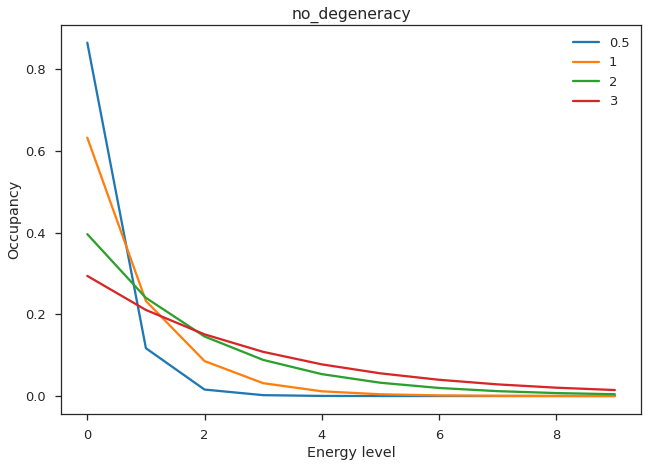

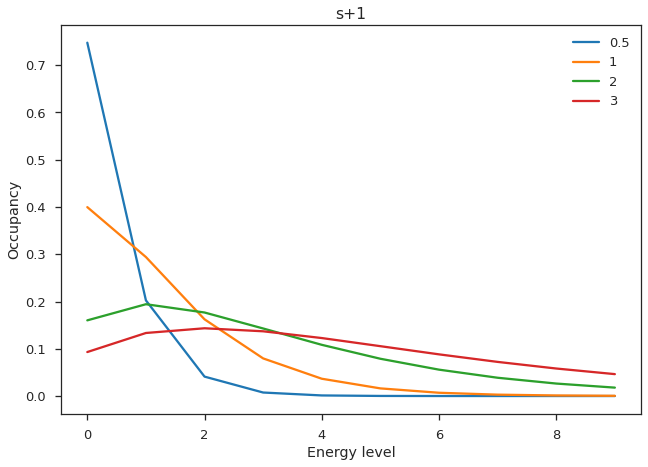

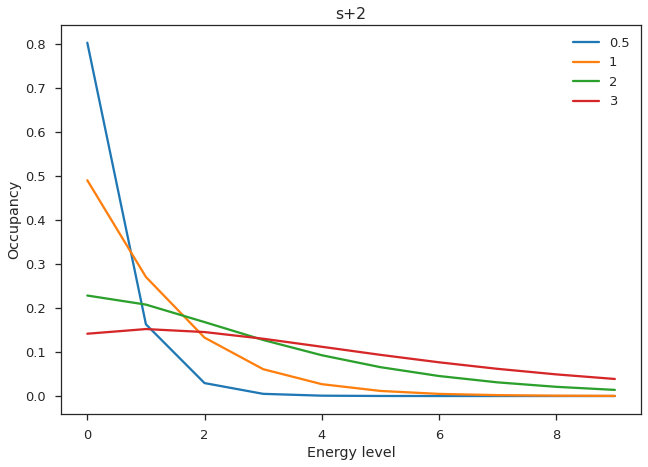

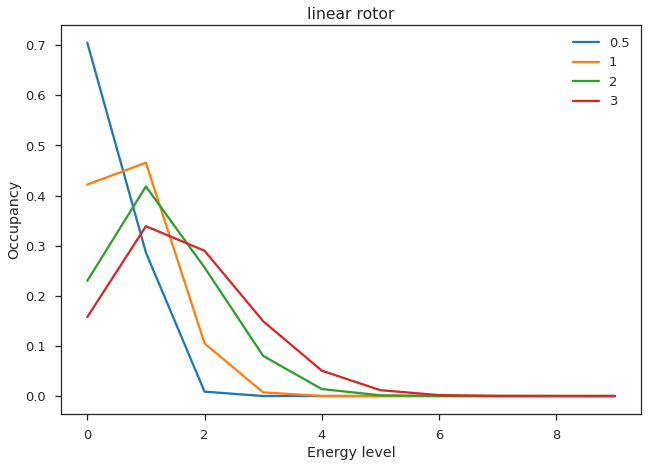

In [3]:
#solution

n_energy_levels= 10
reducedTemperatures=[0.5, 1, 2, 3]


def calculateStateOccupancy(T, i):
    # No degeneracy
    return np.exp(-(1/T)*i)

def calculateStateOccupancy_s1(T, i):
    # Degeneracy s+1
    return (i+1)*np.exp(-(1/T)*i)

def calculateStateOccupancy_s2(T, i):
    # Degeneracy s+2
    return (i+2)*np.exp(-(1/T)*i)
        
def calculateStateOccupancy_rotor(T, i):
    # Linear Rotor
    U=i*(i+1)/2
    return (2*i+1)*np.exp(-(U/T))


functions ={
    "no_degeneracy": calculateStateOccupancy,
    "s+1": calculateStateOccupancy_s1,
    "s+2": calculateStateOccupancy_s2,
    "linear rotor": calculateStateOccupancy_rotor
}

for f in functions.keys():
    fig, ax =plt.subplots(1)
    ax.set_title(f)
    ax.set_xlabel("Energy level")
    ax.set_ylabel("Occupancy")

    calculateOccupancy=functions[f]

    for reducedTemperature in reducedTemperatures:
        distribution = []
        partition_function=np.float64(0)

        for i in range(n_energy_levels):
            stateOccupancy=calculateOccupancy(reducedTemperature, i)
            distribution.append(stateOccupancy)
            partition_function+=stateOccupancy

        ax.plot(distribution/partition_function, label=reducedTemperature)

    ax.legend()
    plt.show()
